<a href="https://colab.research.google.com/github/genarioazevedoufape/estudos_data_science/blob/main/analise_com_api_gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise da Ação PETR4 utilizando a API do Gemini

In [14]:
!pip install google-generativeai
!pip install yfinance
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 821.6 kB/s eta 0:00:00


In [21]:
import pathlib
import textwrap
import google.generativeai as genai
from IPython.display import display
from IPython.display import Markdown
from google.colab import userdata

import pandas as pd
import yfinance as yf
import mplfinance as mpf
import io
import IPython.display as IPydisplay

from PIL import Image
import requests
from io import BytesIO

In [18]:
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [23]:
model = genai.GenerativeModel('gemini-1.5-flash')

In [24]:
def to_markdown(text):
  text = text.replace('•', ' *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

[*********************100%%**********************]  1 of 1 completed


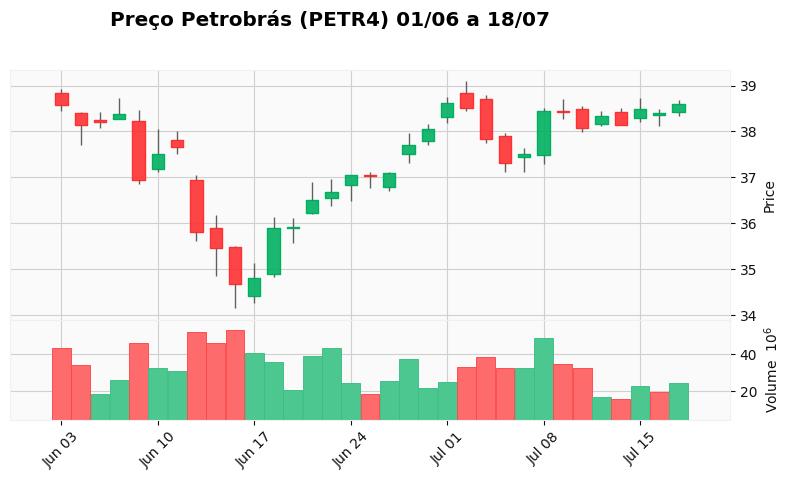

In [19]:
df_petr4 = yf.download('PETR4.SA', start='2024-06-01', end='2024-07-18')
mpf.plot(df_petr4, type='candle', volume=True, style='yahoo',
title="Preço Petrobrás (PETR4) 01/06 a 18/07", figsize=(10,5))

In [20]:
%%capture
buf = io.BytesIO()
mpf.plot(df_petr4, type='candle', volume=True, style='yahoo',
title="Preço Petrobrás (PETR4) 01/06 a 18/07", figsize=(10,5), savefig=buf)
buf.seek(0)

In [22]:
img_PETR4 = Image.open(BytesIO(buf.read()))
img_PETR4.save("grafico_PETR4.png","PNG")

In [25]:
img_PETR4 = Image.open("grafico_PETR4.png")
response = model.generate_content(["Em português, descreva a figura a seguir analisando se devo comprar ou vender PETR4", img_PETR4])
response.resolve()
to_markdown(response.text)

> O gráfico mostra o preço das ações da Petrobras (PETR4) no período de 01/06 a 18/07. Observando o gráfico, vemos que a ação apresentou uma tendência de alta durante esse período.
> 
> * **Junho:** A ação começou o mês em torno de 39 reais e teve uma queda inicial, atingindo os 37 reais no dia 10. Após essa queda, a ação iniciou um movimento de alta, atingindo o pico de 39 reais no dia 24.
> * **Julho:** A ação iniciou o mês em torno de 37 reais e continuou sua tendência de alta, atingindo 39 reais no dia 01. Depois, ela sofreu uma queda e se estabilizou em torno de 38 reais.
> 
> **Analisando o gráfico, podemos notar alguns pontos relevantes:**
> 
> * **Volume:** O volume de negociação da ação é alto em momentos de grande variação de preço, tanto para cima quanto para baixo.
> * **Candles:** A ação apresentou muitos candles verdes (alta) durante o período, indicando uma forte tendência de alta.
> 
> **Considerando a tendência de alta da PETR4, a decisão de comprar ou vender depende da sua estratégia de investimento:**
> 
> * **Compra:** Se você acredita na continuação da tendência de alta, comprar a ação pode ser uma boa opção.
> * **Venda:** Se você acredita que a ação está sobrevalorizada ou que a tendência de alta está perto do fim, vender a ação pode ser uma boa opção.
> 
> **É importante lembrar que:**
> 
> * Este gráfico não é uma recomendação de compra ou venda.
> * As decisões de investimento devem ser tomadas com base em uma análise completa do mercado e de seus próprios objetivos e tolerância ao risco. 
> * Consulte um profissional de investimentos para obter aconselhamento personalizado.
